In [17]:
import os
from PIL import Image
import cairosvg
import numpy as np
import io

svg_dir = "sovereign_flag_svgs"
png_size = (128, 64)  # keep aspect ratio reasonable

flag_arrays = []
flag_codes = []

for f in os.listdir(svg_dir):
    if f.endswith(".svg"):
        iso = f.split(".")[0]  # 'in', 'xk', etc.
        svg_path = os.path.join(svg_dir, f)
        # convert to PNG bytes
        png_bytes = cairosvg.svg2png(url=svg_path, output_width=png_size[0], output_height=png_size[1])
        img = Image.open(io.BytesIO(png_bytes)).convert("RGB")
        arr = np.array(img).flatten() / 255.0  # normalize
        flag_arrays.append(arr)
        flag_codes.append(iso)


In [18]:
import cv2

def color_histogram(image_array):
    image = image_array.reshape(png_size[1], png_size[0], 3)
    hist = []
    for i in range(3):  # BGR channels
        h = cv2.calcHist([image.astype('float32')], [i], None, [32], [0,1])  # normalized
        hist.extend(h.flatten())
    return np.array(hist)

features = np.array([color_histogram(arr) for arr in flag_arrays])

In [19]:
from tensorflow.keras.applications import resnet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

# Load pretrained ResNet50 without top layer
base_model = resnet50.ResNet50(weights='imagenet', include_top=False, pooling='avg')
def cnn_feature(img_array):
    img = img_array.reshape(png_size[1], png_size[0], 3)
    img_resized = cv2.resize(img, (224,224))
    x = np.expand_dims(img_resized, axis=0)
    x = preprocess_input(x)
    return base_model.predict(x)[0]

features = np.array([cnn_feature(arr) for arr in flag_arrays])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 983ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━

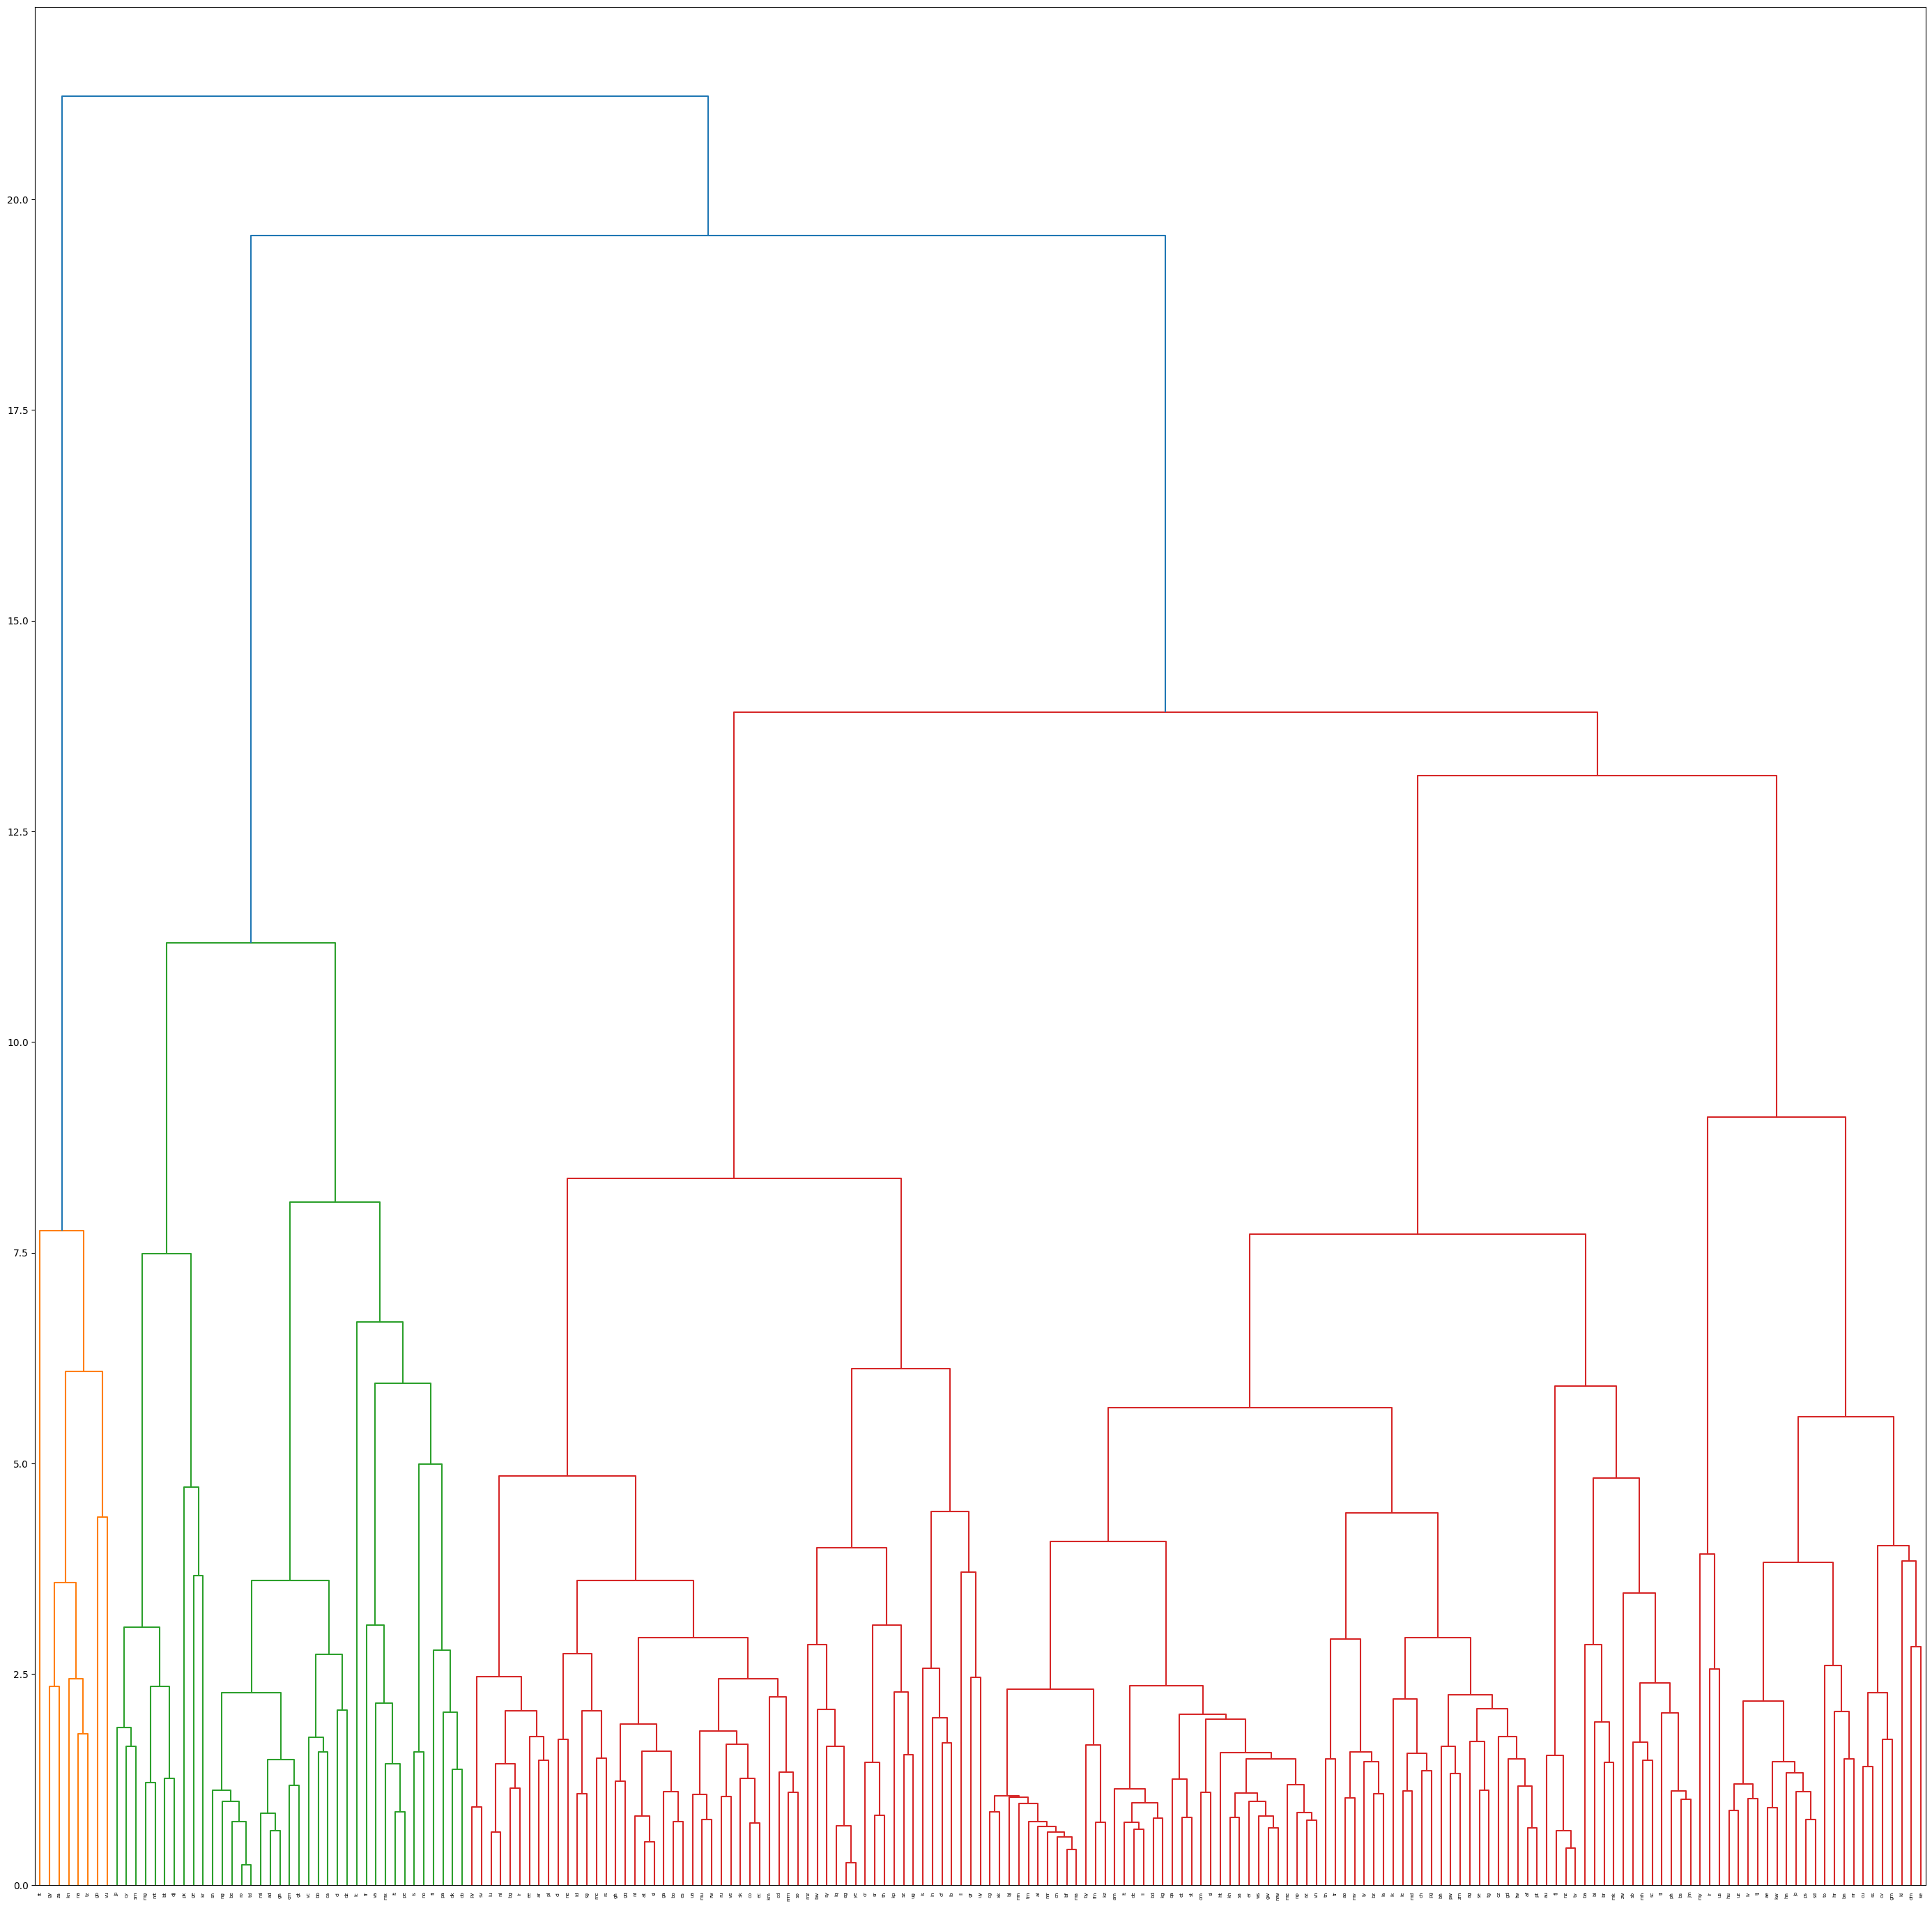

ad 11
ae 47
af 38
ag 38
al 33
am 34
ao 36
ar 20
at 23
au 39
az 34
ba 41
bb 12
bd 34
be 11
bf 33
bg 20
bh 38
bi 40
bj 33
bn 48
bo 23
br 40
bs 42
bt 7
bw 25
by 33
bz 36
ca 12
cd 24
cf 29
cg 33
ch 37
ci 13
cl 21
cm 11
cn 33
co 24
cr 27
cu 50
cv 50
cy 6
cz 38
de 34
dj 7
dk 17
dm 51
do 17
dz 13
ec 24
ee 20
eg 25
er 34
es 23
et 34
fi 18
fj 39
fm 33
fr 15
ga 23
gb 3
gd 38
ge 8
gh 23
gm 50
gn 11
gq 23
gr 31
gt 11
gw 34
gy 1
hn 47
hr 48
ht 34
hu 47
id 22
ie 37
il 32
in 29
iq 25
ir 20
is 16
it 14
jm 42
jo 47
jp 6
ke 52
kg 34
kh 34
ki 53
km 24
kn 2
kp 28
kr 9
kw 47
kz 33
la 36
lb 29
lc 19
li 34
lk 37
lr 44
ls 30
lt 34
lu 20
lv 47
ly 36
ma 33
mc 22
md 37
me 34
mg 7
mh 42
mk 40
ml 11
mm 24
mn 33
mr 33
mt 7
mu 24
mv 36
mw 34
mx 14
my 46
mz 26
na 2
ne 21
ng 11
ni 20
nl 23
no 16
np 34
nr 48
nz 39
om 34
pa 17
pe 14
pg 37
ph 42
pk 10
pl 20
ps 47
pt 38
pw 38
py 20
qa 34
ro 11
rs 22
ru 24
rw 24
sa 34
sb 42
sc 42
sd 47
se 38
sg 22
si 34
sk 24
sl 23
sm 6
sn 11
so 24
sr 27
ss 50
st 34
sv 20
sy 25
sz 28
td 11

In [23]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

Z = linkage(features, method='ward')  # or 'average'
plt.figure(figsize=(35, 35))
dendrogram(Z, labels=flag_codes, leaf_rotation=90)
plt.show()

# Optional: assign cluster labels at a chosen distance threshold
clusters = fcluster(Z, t=2.5, criterion='distance')
for code, c in zip(flag_codes, clusters):
    print(code, c)


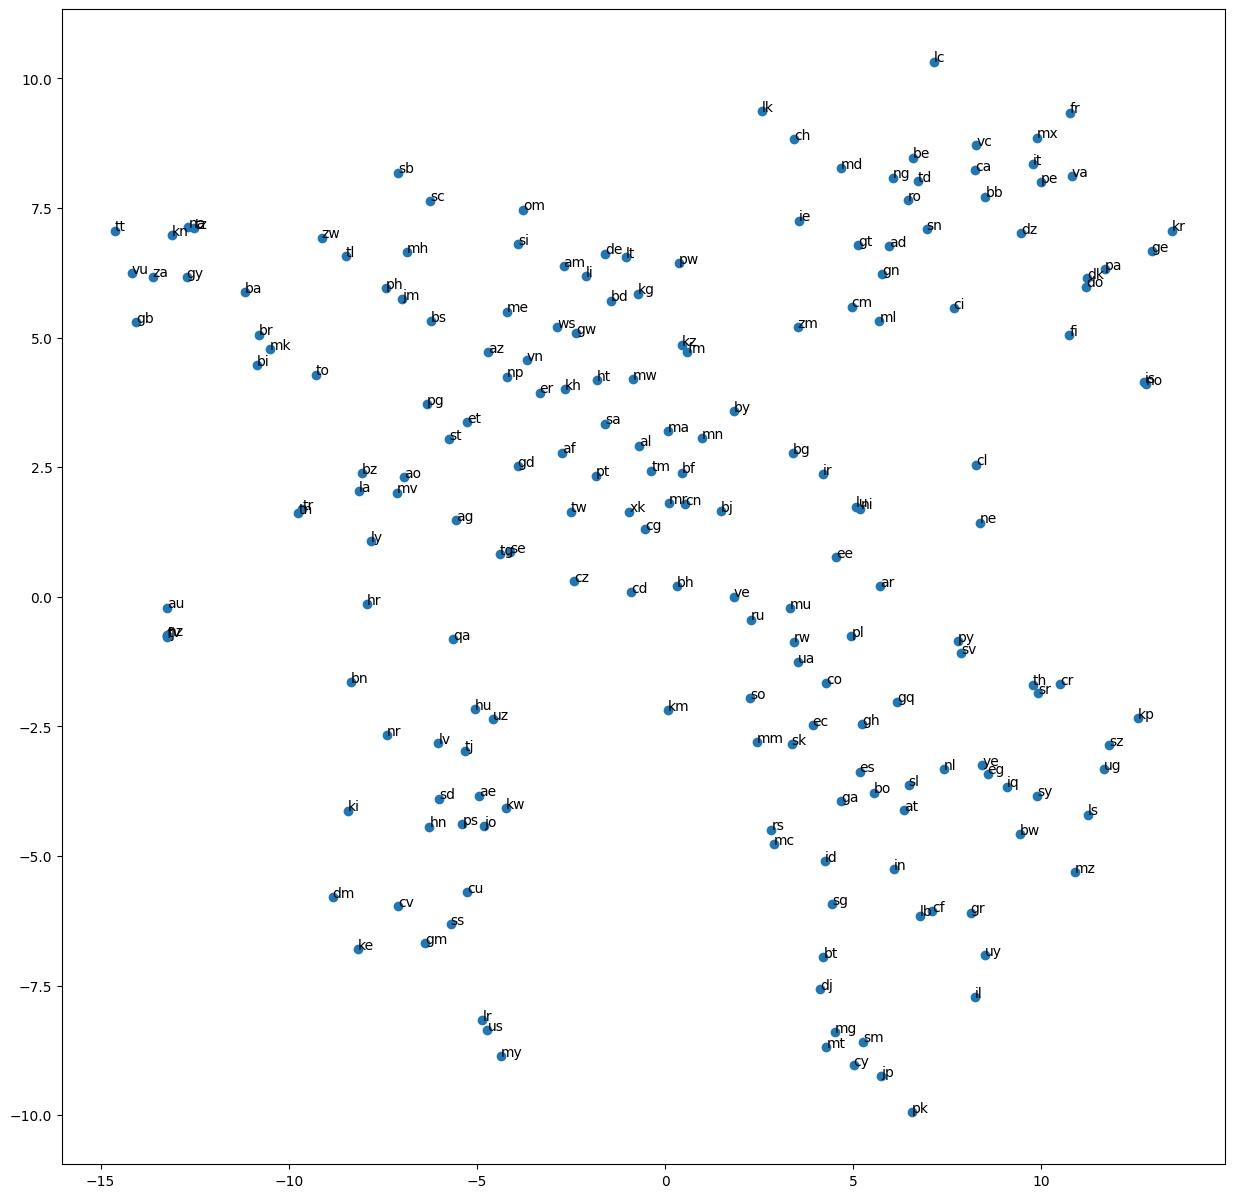

In [24]:
from sklearn.manifold import TSNE
emb2d = TSNE(n_components=2, random_state=42).fit_transform(features)
plt.figure(figsize=(15,15))
plt.scatter(emb2d[:,0], emb2d[:,1])
for i, txt in enumerate(flag_codes):
    plt.annotate(txt, (emb2d[i,0], emb2d[i,1]))
plt.show()

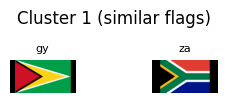

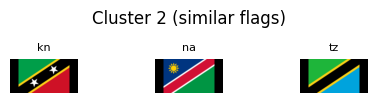

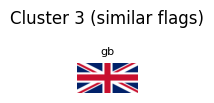

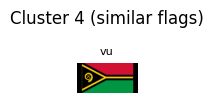

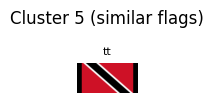

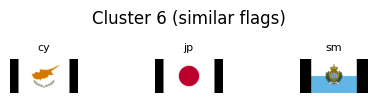

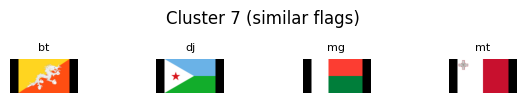

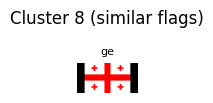

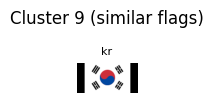

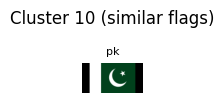

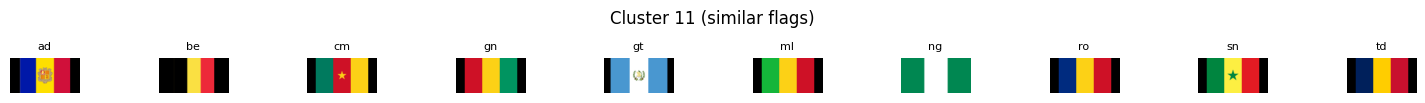

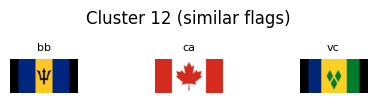

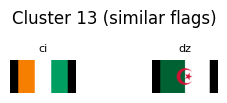

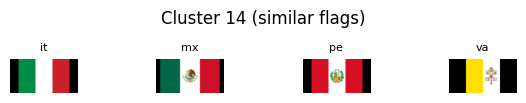

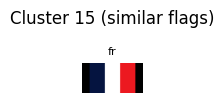

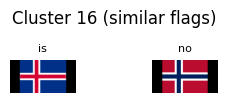

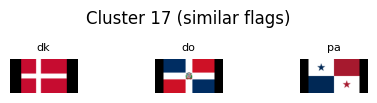

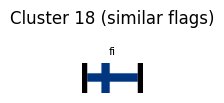

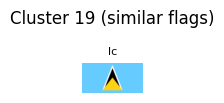

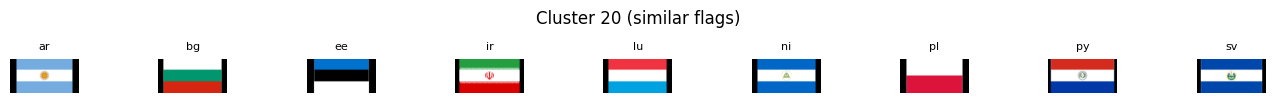

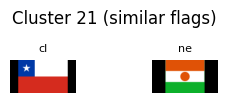

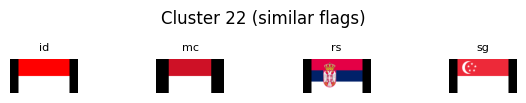

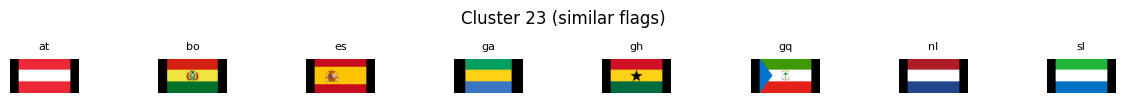

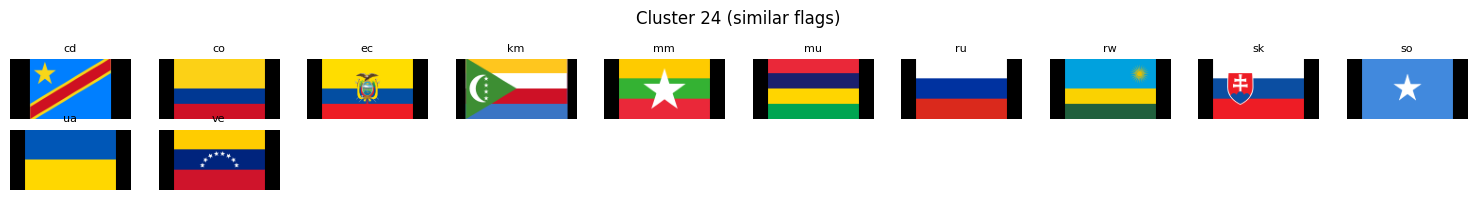

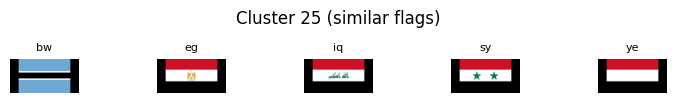

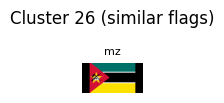

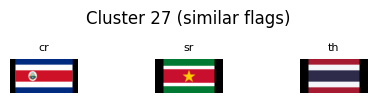

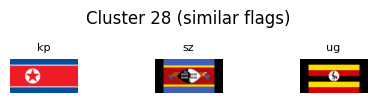

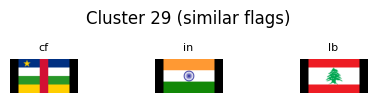

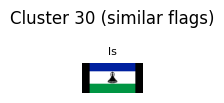

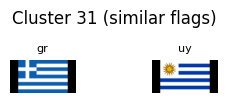

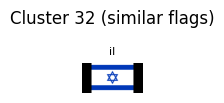

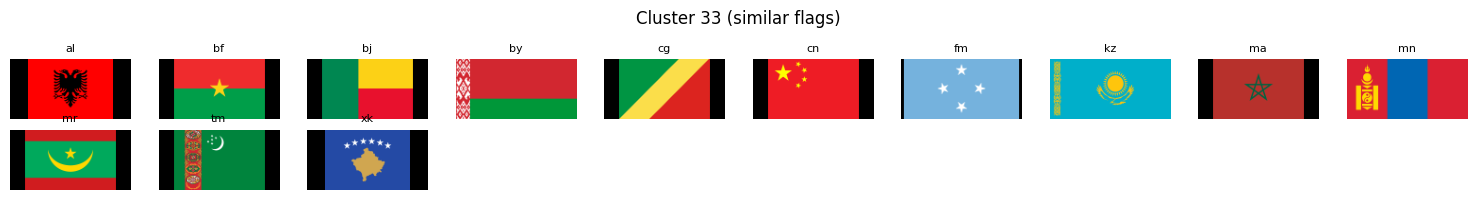

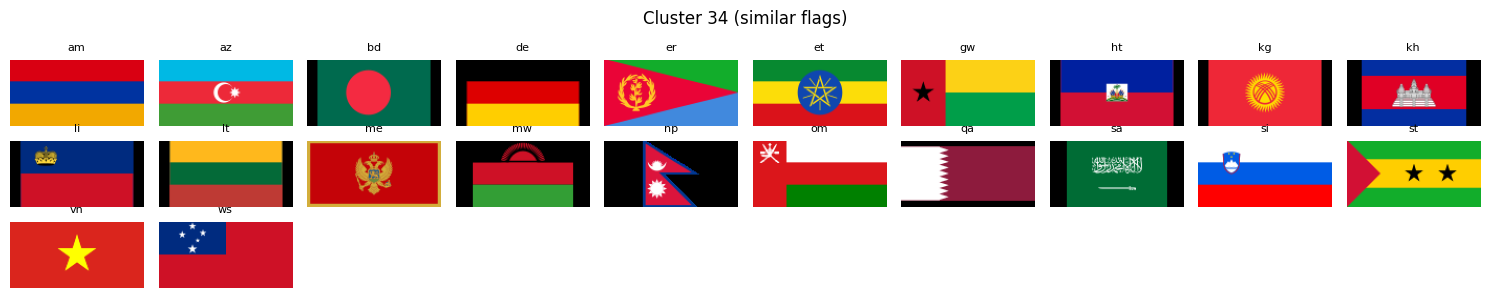

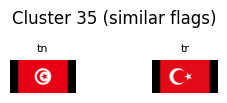

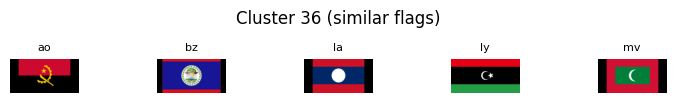

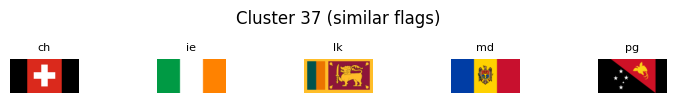

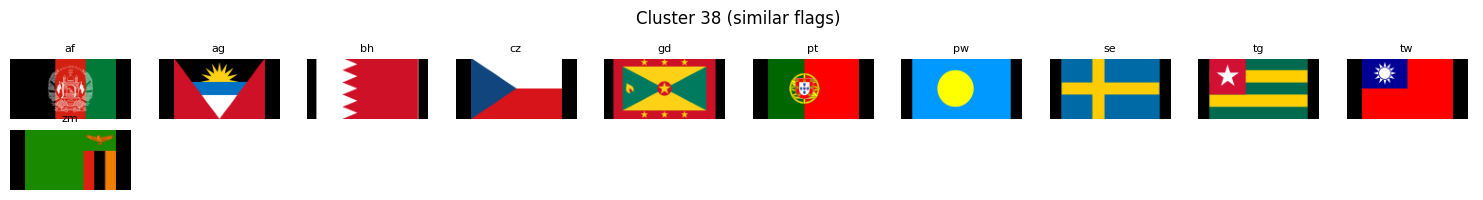

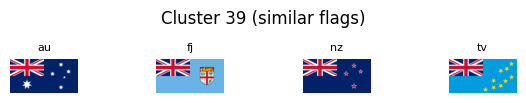

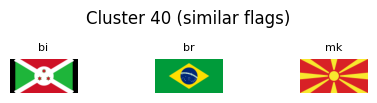

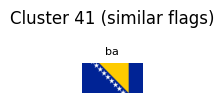

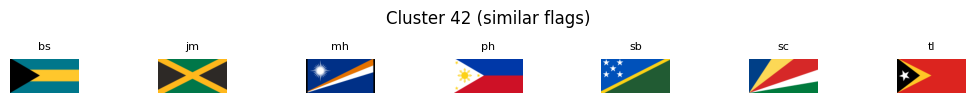

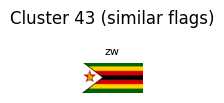

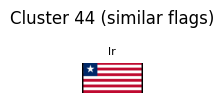

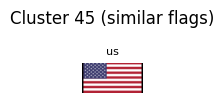

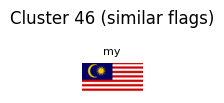

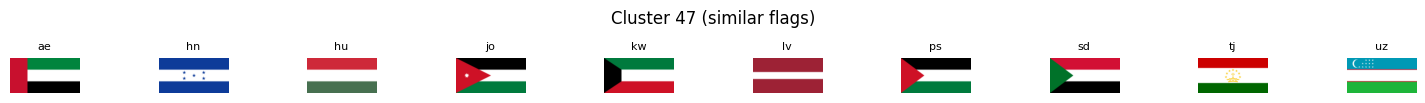

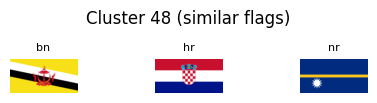

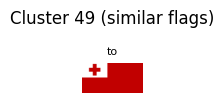

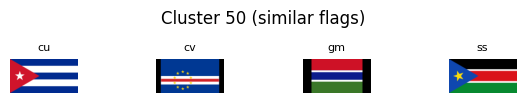

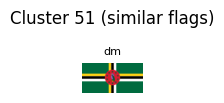

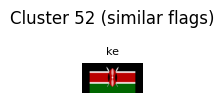

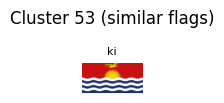

In [25]:
import math
from PIL import Image
import matplotlib.pyplot as plt

# assume:
# flag_codes = list of codes
# arrs = list of RGB arrays for each flag (same size)
# clusters = array of cluster IDs from fcluster
# png_size = (w,h)

n_clusters = max(clusters)
flag_arrays = [svg_to_array(os.path.join(svg_dir, f"{code}.svg"), png_size) for code in flag_codes]

for c in range(1, n_clusters+1):
    idxs = [i for i,cl in enumerate(clusters) if cl==c]
    if not idxs: 
        continue
    n = len(idxs)
    cols = min(10, n)  # max 10 flags per row
    rows = math.ceil(n/cols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols*1.5, rows*1.0))
    axes = np.array(axes).reshape(rows,cols)
    for r in range(rows):
        for col in range(cols):
            ax = axes[r,col]
            ax.axis('off')
            i = r*cols+col
            if i<n:
                arr = flag_arrays[idxs[i]]
                ax.imshow(arr)
                ax.set_title(flag_codes[idxs[i]], fontsize=8)
    plt.suptitle(f"Cluster {c} (similar flags)")
    plt.tight_layout()
    plt.show()
